## AUTOENCODER-BASED ANOMALY DETECTION

### 1. Import Libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense



### 2.Load Dataset

In [15]:
# Load the CSV file
df = pd.read_csv("SAML-D.csv")
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,07/10/2022,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,07/10/2022,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,07/10/2022,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,07/10/2022,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,07/10/2022,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


### 3.Preprocessing the Data

In [16]:
# Drop missing values
df.dropna(inplace=True)

# Encode 'Payment_currency' if it exists
if 'Payment_currency' in df.columns:
    df['Payment_currency'] = LabelEncoder().fit_transform(df['Payment_currency'])

# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Scale numeric values
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df_numeric)

# Create scaled DataFrame
df_scaled = pd.DataFrame(df_scaled_values, columns=numeric_cols)
df_scaled.head()




,Sender_account,Receiver_account,Amount,Payment_currency,Is_laundering
0,1.286181,-0.785216,-0.296513,0.163899,-0.030208
1,-1.216551,1.168581,-0.109958,0.163899,-0.030208
2,-1.633406,-0.217866,0.229929,0.163899,-0.030208
3,0.127652,1.584591,0.130385,0.163899,-0.030208
4,1.593958,-0.426512,-0.351488,0.163899,-0.030208


### 4. Build Autoencoder Model

In [17]:
# Drop missing values
df.dropna(inplace=True)

# Encode 'Payment_currency' if it exists
if 'Payment_currency' in df.columns:
    df['Payment_currency'] = LabelEncoder().fit_transform(df['Payment_currency'])

# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Scale numeric values
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df_numeric)

# Create scaled DataFrame
df_scaled = pd.DataFrame(df_scaled_values, columns=numeric_cols)
df_scaled.head()


,Sender_account,Receiver_account,Amount,Payment_currency,Is_laundering
0,1.286181,-0.785216,-0.296513,0.163899,-0.030208
1,-1.216551,1.168581,-0.109958,0.163899,-0.030208
2,-1.633406,-0.217866,0.229929,0.163899,-0.030208
3,0.127652,1.584591,0.130385,0.163899,-0.030208
4,1.593958,-0.426512,-0.351488,0.163899,-0.030208


### 5.Train Autoencoder

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the input dimension based on your scaled data
input_dim = df_scaled.shape[1]

# Build a simple autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')


### 6. Plot Training and Validation Loss

Epoch 1/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 0.0307 - val_loss: 0.0044
Epoch 2/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.0020 - val_loss: 0.0139
Epoch 3/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 4/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.0014 - val_loss: 2.8529e-04
Epoch 5/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 6/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.0025 - val_loss: 9.9588e-04
Epoch 7/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 0.0014 - val_loss: 8.2566e-04
Epoch 8/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - loss: 0.0011 - val_loss: 7.1780e-04
Epoch 9/50
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.0015 - val_loss: 6.6601e-04


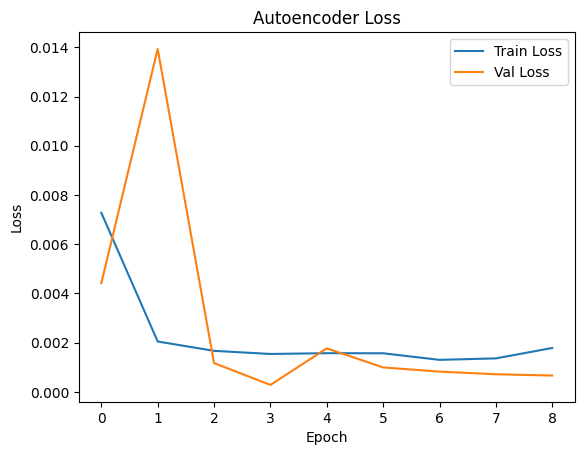

In [20]:
# Set early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train autoencoder
history = autoencoder.fit(
    df_scaled, df_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 7. Compute Reconstruction Error

In [21]:
# Predict and calculate reconstruction error
reconstructions = autoencoder.predict(df_scaled)
mse = np.mean(np.square(df_scaled - reconstructions), axis=1)

# Add error to dataframe
df_scaled['reconstruction_error'] = mse



32768/32768 ━━━━━━━━━━━━━━━━━━━━ 28s 862us/step


### 8. Detect Anomalies Based on Threshold

In [ ]:
# Set threshold and detect anomalies
threshold = np.percentile(mse, 95)
df_scaled['anomaly'] = (df_scaled['reconstruction_error'] > threshold).astype(int)

print("Anomalies Detected:", df_scaled['anomaly'].sum())
df_scaled[['reconstruction_error', 'anomaly']].head()


Anomalies Detected: 9508


,reconstruction_error,anomaly
0,0.000052,0
1,0.000018,0
2,0.000182,0
3,0.000178,0
4,0.000114,0


## LIGHTGBM-BASED CLASSIFICATION MODEL

### 1. Import librarise

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0151106
Accuracy: 0.995792905787384
Precision: 0.9626218851570965
Recall: 0.9512847965738758
F1 Score: 0.9569197630586969

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36163
           1       0.96      0.95      0.96      1868

    accuracy                           1.00     38031
   macro avg       0.98      0.97      0.98     38031
weighted avg       1.00      1.00      1.00     38031



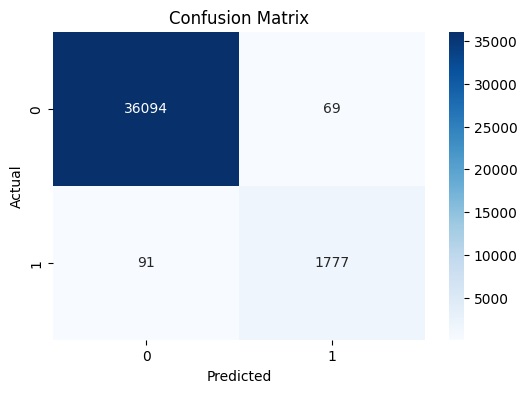

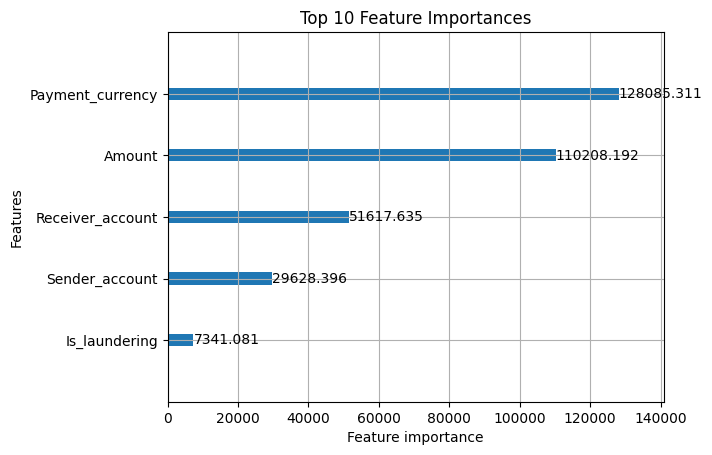

In [ ]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Example placeholder (replace with your actual data)
# df = pd.read_csv("your_dataset.csv")
# X = df.drop('target', axis=1)
# y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=100,
    verbosity=-1
)

# Fit model using callbacks for early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='binary_logloss',
    callbacks=[lgb.callback.early_stopping(stopping_rounds=10), lgb.callback.log_evaluation(0)]
)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
lgb.plot_importance(model, max_num_features=10, importance_type='gain', title='Top 10 Feature Importances')
plt.show()


### 2. Evaluate Model

In [ ]:
# Predict and convert to binary
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36163
           1       0.96      0.95      0.96      1868

    accuracy                           1.00     38031
   macro avg       0.98      0.97      0.98     38031
weighted avg       1.00      1.00      1.00     38031



### 3. Confusion Matrix

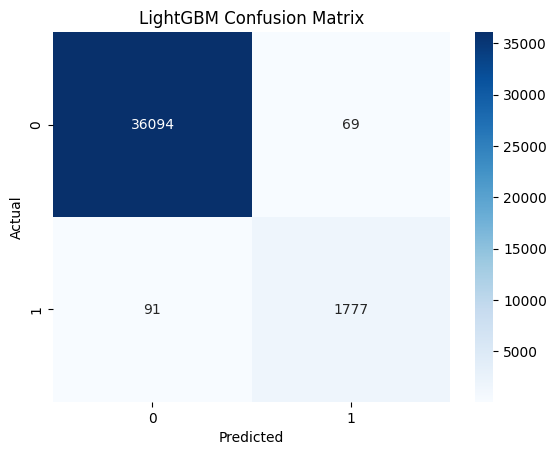

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_binary), annot=True, fmt='d', cmap='Blues')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



### 4.  Feature Importance

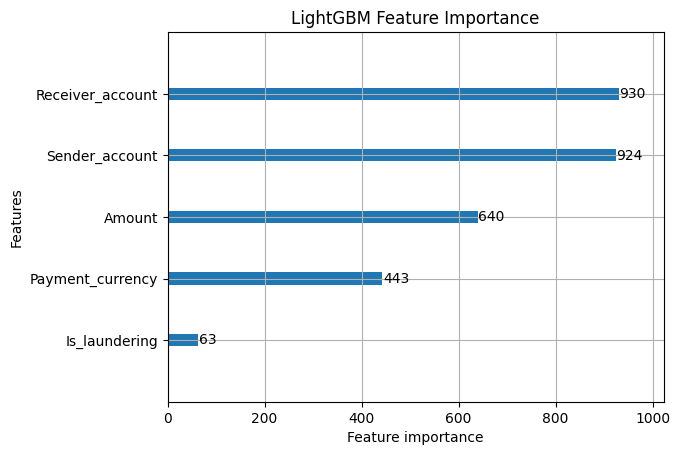

In [ ]:
lgb.plot_importance(model, max_num_features=10)
plt.title("LightGBM Feature Importance")
plt.show()
